In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sprinter

In [3]:
qfib_dir = '/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_TCK_v2/'
qfib_ext = '.tck'
dpy_dir = '/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_TCK_v2/'
dpy_ext = '.tck'
tko_dir = '/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/'
tko_ext = '.vtk'

files = []#['CA', 'CC', 'CP']
for f in os.listdir(tko_dir):
    if f.endswith('vtk'):
        files.append(f.split('.')[0])
        
files = files[0:2]

input_size = 0
for f in files:
    print(os.path.join(tko_dir, f+tko_ext), os.path.getsize(os.path.join(tko_dir, f+tko_ext)))
    input_size += os.path.getsize(os.path.join(tko_dir, f+tko_ext))
input_size /= float(len(files))

qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [6,7,8,9,10,11,12,13,14]
dpy_files =  [(dpy_dir, f+dpy_ext) for f in files]


/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/OR_right.vtk 17275391
/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/MCP.vtk 50988755


In [4]:
files

['OR_right', 'MCP']

In [5]:
dpy_sizes, dpy_errors, dpy_stds = sprinter.Sprinter.run_dpy(qfib_files)

[6.101470470428467, 26.89264464378357, (10438495, 10232968, 1.9689332609729604, 1.0200847886947364), (0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0)]
0.0 0.0
[12.920686960220337, 116.29215860366821, (30745207, 28832832, 6.22007521367477, 1.0663262977427954), (0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0)]
0.0 0.0


In [6]:
qfib_sizes, qfib_errors, qfib_stds = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [7]:
qfib_sizes

[2075919.0, 3744953.0]

In [8]:
qfib_errors

[15.089823722839355, 15.092788696289062]

In [9]:
runs = {}

In [10]:
config = {
    'name': 'default'
}
tko_sizes, tko_errors, tko_stds = sprinter.Sprinter.run_trako(config, tko_files, [14])
runs[config['name']] = [tko_sizes, tko_errors, tko_stds]

In [11]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbponly{bits}'
}
tko_sizes, tko_errors, tko_stds = sprinter.Sprinter.run_trako(config, tko_files, tko_bits)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds]

In [12]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}'
}
tko_sizes, tko_errors, tko_stds = sprinter.Sprinter.run_trako(config, tko_files, tko_bits)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds]

In [13]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':0,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':0,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi_CL0_{bits}'
}
tko_sizes, tko_errors, tko_stds = sprinter.Sprinter.run_trako(config, tko_files, tko_bits)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds]

In [14]:
qfib_sizes

[2075919.0, 3744953.0]

In [15]:
qfib_errors

[15.089823722839355, 15.092788696289062]

In [59]:
dpy_sizes

[39065800]

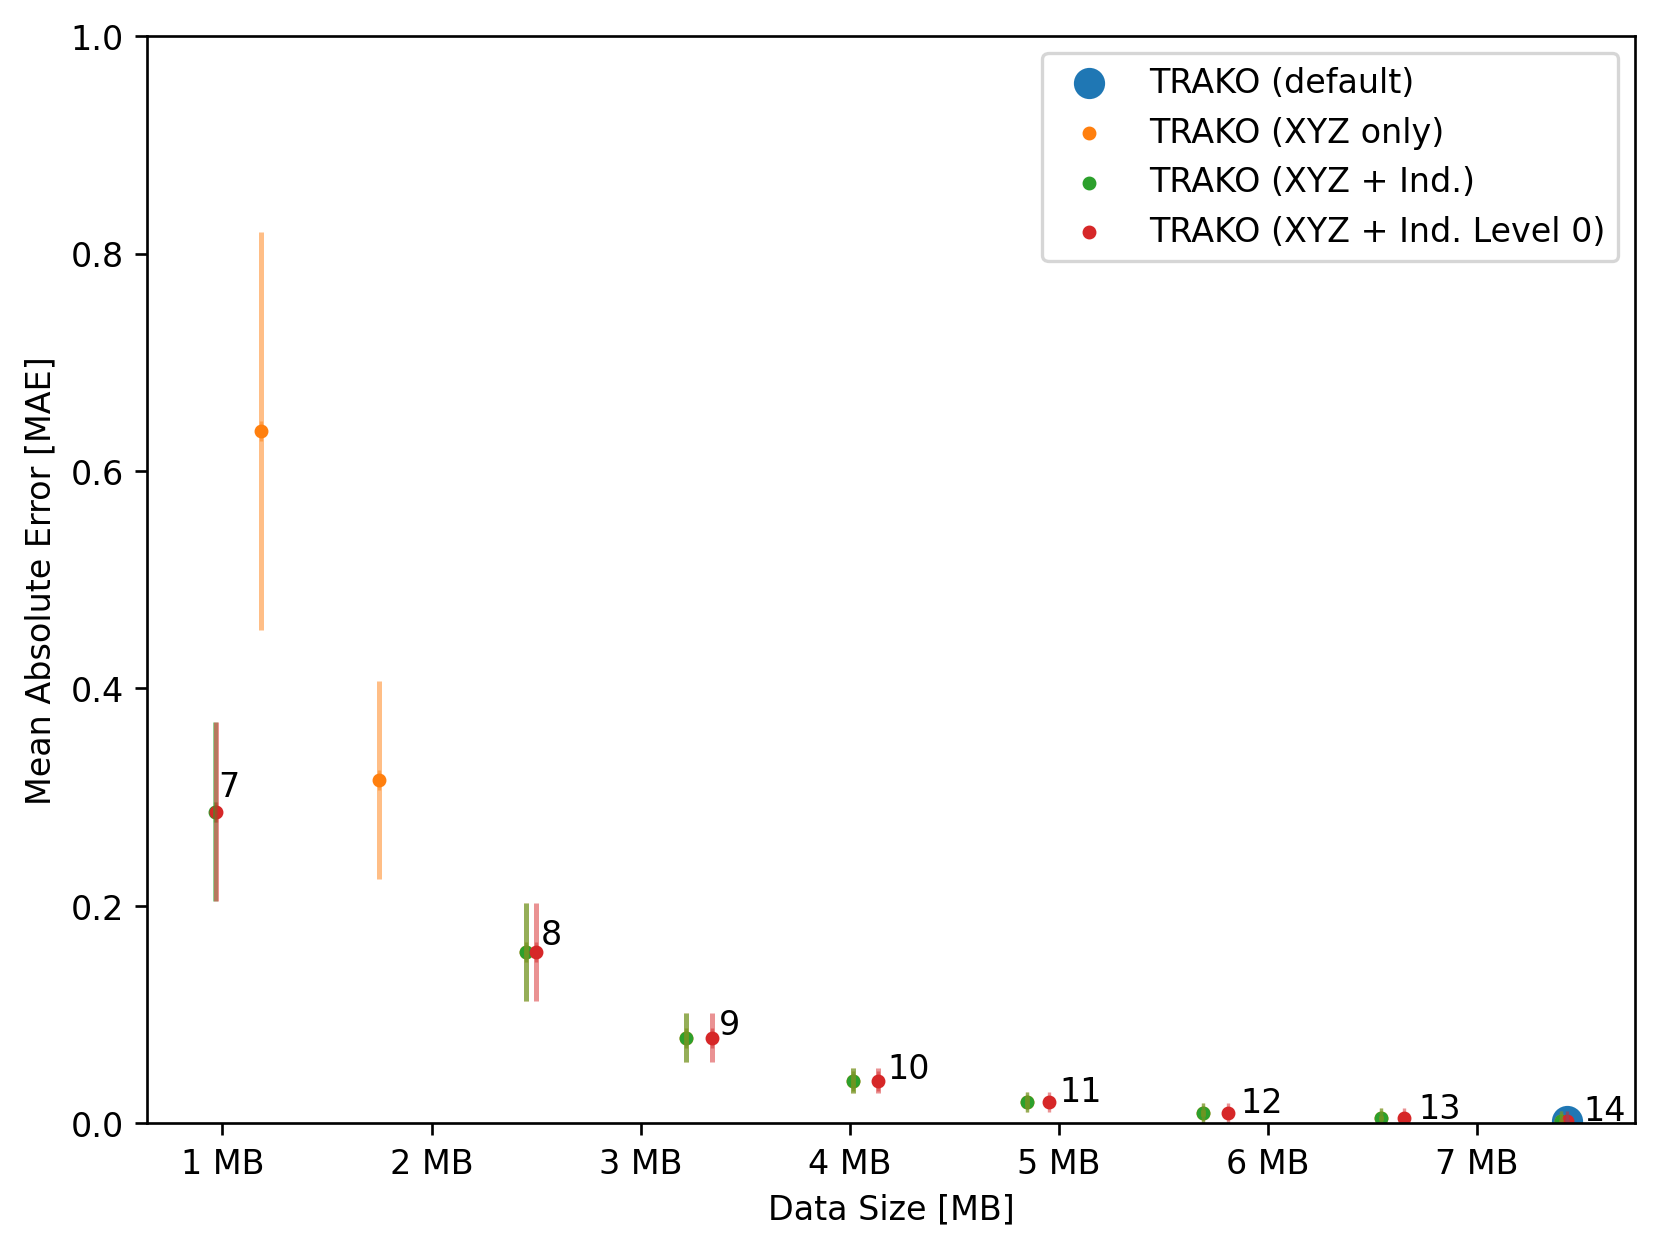

In [57]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,1), filename='/tmp/out.pdf')
sprinter.Sprinter.bitsplot(plt, tkoruns=runs, ylim=(0,1), filename='/tmp/out.pdf')

In [34]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,.175), xlim=(2,8))
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=None, ylim=(0,.175), xlim=(0,8))